<div class="span5 alert alert-info">

### Part 1 ‑ Exploratory data analysis
The logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15-minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.
</div>

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

sns.set()

In [2]:
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [4]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
# Aggregate login counts based on 15-minute time intervals

logins.index = logins.login_time
login_count_15min = logins.resample("15T").count()
login_count_15min.rename(columns={'login_time':'login_count'},inplace=True)
login_count_15min.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Text(0.5,1,'Number of logins in 15-minute interval between 1/1/1970 and 4/13/1970 ')

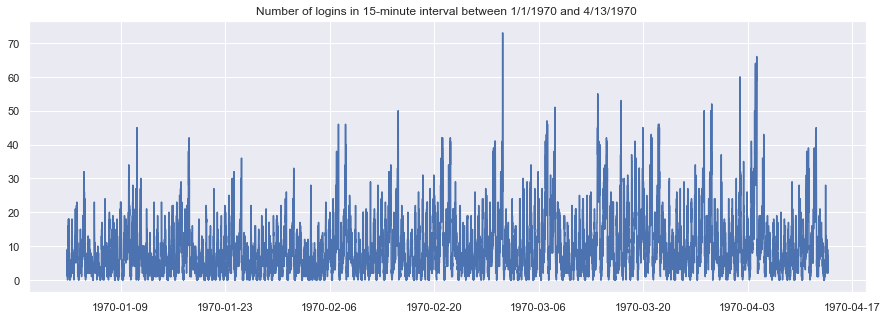

In [6]:
fig = plt.figure(figsize=(15, 5))
plt.plot(login_count_15min)
plt.title('Number of logins in 15-minute interval between 1/1/1970 and 4/13/1970 ')

Above graph shows regular pattern of logins. In order to know how this count is varying, we look at the trend over a month.

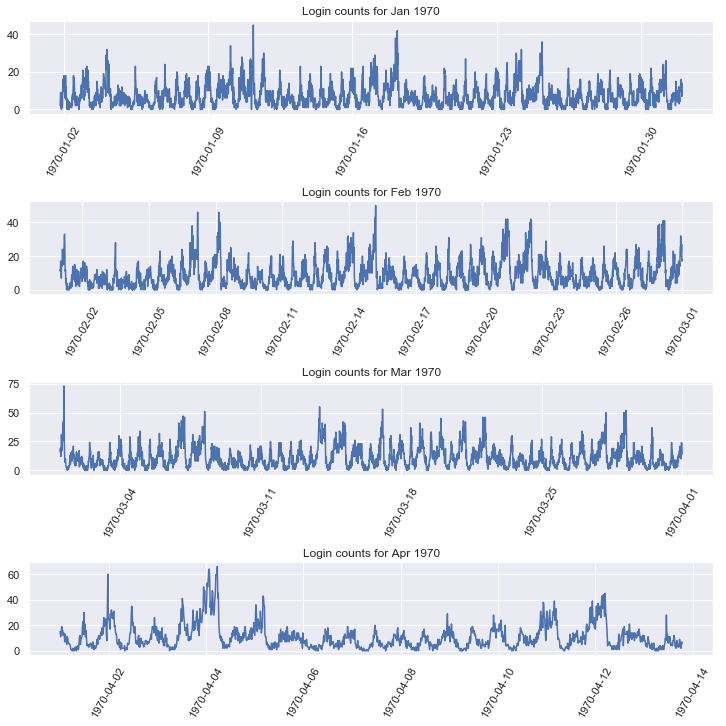

In [7]:
fig = plt.figure(figsize=(10, 10))

plt.subplot(4,1,1)
plt.plot(login_count_15min['1970-01'])
plt.xticks(rotation=60)
plt.title('Login counts for Jan 1970')

plt.subplot(4,1,2)
plt.plot(login_count_15min['1970-02'])
plt.xticks(rotation=60)
plt.title('Login counts for Feb 1970')

plt.subplot(4,1,3)
plt.plot(login_count_15min['1970-03'])
plt.xticks(rotation=60)
plt.title('Login counts for Mar 1970')

plt.subplot(4,1,4)
plt.plot(login_count_15min['1970-04'])
plt.xticks(rotation=60)
plt.title('Login counts for Apr 1970')

plt.tight_layout(pad=.4, w_pad=4.0, h_pad=1.0)


All the monthly trends show similar fluctuations in number of logins at regular interval. We will aggregate all the logins on the basis of day of the week to see if there is a trend there.

([<matplotlib.axis.XTick at 0x1dbe8e41cc0>,
 <a list of 7 Text xticklabel objects>)

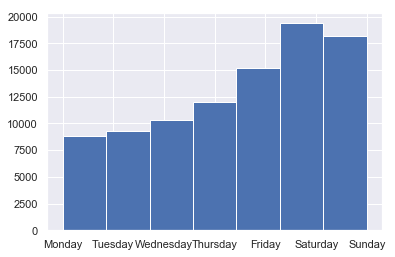

In [8]:
plt.hist(logins.login_time.dt.dayofweek,bins=7)
plt.xticks(np.arange(7),('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))


Text(0.5,1,'Number of logins at each hour of the day (Total logins from Jan-1-1970 to Apr-13-1970)')

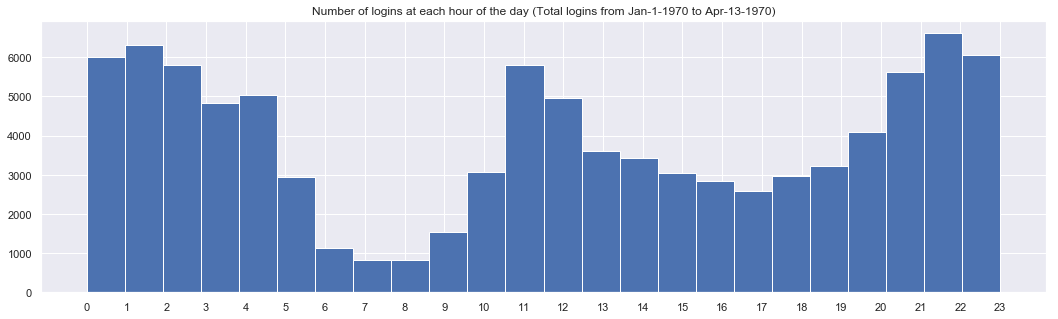

In [9]:
fig = plt.figure(figsize=(18, 5))
plt.hist(logins.login_time.dt.hour,bins=24)
plt.xticks(np.arange(24))
plt.title('Number of logins at each hour of the day (Total logins from Jan-1-1970 to Apr-13-1970)')

### Conclusion:
1. The weekends see higher logins than the weekdays.
2. During any day, there are very few number of logins between 6-9am.
3. The number of logins show an increasing trend over months.

<div class="span5 alert alert-info">

### Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. 

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    1. how you will implement the experiment
    1. what statistical test(s) you will conduct to verify the significance of the observation
    1. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
</div>

<div class="span5 alert alert-success">

### Key measure of success

The measure of success depends on what is the company trying to achieve here. The possible objectives could be:
1. Capture market share
2. Increase customer base
3. Increase on-road time of driver partners
4. Increase profits
5. Increase driver partners availability in both cities

In the given case, clearly the objective is to increase driver availability in both cities. So the key measure of success would be <b>number of drivers driving from one city to another</b>. This measure would give the increase in number of drivers available in both cities which is the ultimate objective.

Assumptions made in arriving at the solution:
1. Toll remains same during all hours of a day and weekdays as well as weekends
2. The driver partners had to pay the toll from their pocket before the experiment

### Practical experiment to compare the effectiveness of the proposed change

A. Implementing the experiment:
   <p> Decide on a test period during which the experiment will be given a test run. Let us say the test period is decided to be 3 months. Before the test period, we look at the data of past 3 months on the daily number of rides from one city to another. Now, for the test period, the toll is reimbursed to the driver partners. After the test period of 3 months, we again look at the number of rides between 2 cities.</p>
    
    
B. Statistical test for significance:
    <p> We will apply A/B testing to see the effect of our experiment and then use t-statistic to measure if the difference is significant. </p>
    
    
C. Results and Recommendations
    <p> If the number of rides between the two cities increase siginificantly during the test period, we can say that our experiment is successful and we can implement the experiment now.
    However, as the experiment involves reimbursement of toll-charges, this idea might lead to reduced profit for Ultimate. Our experiment just involved encouraging more driver partners to serve both cities, it did not take any monetary implications into account.
    

</div>

<div class="span5 alert alert-info">

### Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).
</div>

In [10]:
openfile=open('ultimate_data_challenge.json')
jsondata=json.load(openfile)
users=pd.DataFrame(jsondata)

openfile.close()

users.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


##### Observations:
1. 3 columms have NaN values: We address these by:
    1. avg_rating_by_driver: fill NaN with mean
    2. avg_rating_of_driver: fill NaN with mean
    3. phone: Fill NaN values in the ratio of other values
2. Last trip date and signup date to be converted to datetime object

In [12]:
# Convert dates to datetime objects
users.signup_date  = [pd.to_datetime(item) for item in users.signup_date]
users.last_trip_date = [pd.to_datetime(item) for item in users.last_trip_date]

In [13]:
# Checking for bad data
users.describe(include = 'all')

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000,50000,49604,50000,50000.000000,50000.000000,50000,50000.000000
unique,NaN,NaN,NaN,NaN,3,182,2,31,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,Winterfell,2014-06-29 00:00:00,iPhone,2014-01-18 00:00:00,NaN,NaN,False,NaN
freq,NaN,NaN,NaN,NaN,23336,2036,34582,2948,NaN,NaN,31146,NaN
first,NaN,NaN,NaN,NaN,NaN,2014-01-01 00:00:00,NaN,2014-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2014-07-01 00:00:00,NaN,2014-01-31 00:00:00,NaN,NaN,NaN,NaN
mean,5.796827,4.778158,4.601559,1.074764,NaN,NaN,NaN,NaN,8.849536,2.278200,NaN,60.926084
std,5.707357,0.446652,0.617338,0.222336,NaN,NaN,NaN,NaN,19.958811,3.792684,NaN,37.081503
min,0.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000
25%,2.420000,4.700000,4.300000,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,33.300000


##### Observations:

1. Max value of trips_in_first_30_days is 125, which means on an average roughly 4 trips per day, which seems to be very high
2. avg_surge of 8 seems to be very high
3. Rest of the values seem to be in reasonable limits

In [14]:
users.trips_in_first_30_days.value_counts().sort_index(ascending=False).head(10)

125    1
73     1
71     1
63     1
58     1
56     2
55     2
54     2
53     2
51     1
Name: trips_in_first_30_days, dtype: int64

In [15]:
users.avg_surge.value_counts().sort_index(ascending=False).head(10)

8.00     1
5.75     1
5.00     5
4.75     1
4.50     4
4.25     5
4.00    12
3.75     5
3.63     1
3.50     9
Name: avg_surge, dtype: int64

As there are only single entries of trips_in_first_30_days and high avg_surge, we will drop these outliers. We will also convert the dates to datetime objects

In [16]:
# Drop outliers
users=users.drop(users[users.trips_in_first_30_days==125].index).reset_index(drop=True)
users=users.drop(users[users.avg_surge==8].index).reset_index(drop=True)

In [17]:
users.phone.value_counts(normalize=True)

iPhone     0.697149
Android    0.302851
Name: phone, dtype: float64

In [18]:
# Fill NaN values

users['phone'] = users['phone'].fillna(pd.Series(np.random.choice(['iPhone', 'Android'], p=[0.70, 0.30], size=len(users))))
users.avg_rating_by_driver.fillna(users.avg_rating_by_driver.mean(),inplace=True)
users.avg_rating_of_driver.fillna(users.avg_rating_of_driver.mean(),inplace=True)

In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 12 columns):
avg_dist                  49998 non-null float64
avg_rating_by_driver      49998 non-null float64
avg_rating_of_driver      49998 non-null float64
avg_surge                 49998 non-null float64
city                      49998 non-null object
last_trip_date            49998 non-null datetime64[ns]
phone                     49998 non-null object
signup_date               49998 non-null datetime64[ns]
surge_pct                 49998 non-null float64
trips_in_first_30_days    49998 non-null int64
ultimate_black_user       49998 non-null bool
weekday_pct               49998 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [20]:
# Adding a column with boolean values to indicate customer retention

retention_cutoff_date = users.last_trip_date.max().date()
users['retained'] = (users.last_trip_date.dt.date >= retention_cutoff_date-datetime.timedelta(days=30)).astype(int)
users.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [21]:
users.retained.sum()

18803

Out of a total of 49998 customers who signed up in January 2014, 18803 are retained, which is 38% retention rate.

We would like to see the signup date for retained and not retained customers

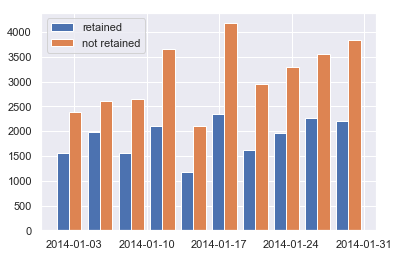

In [22]:
retained=list(users[users.retained==1].signup_date)
not_retained = list(users[users.retained==0].signup_date)

plt.hist([retained,not_retained],label=['retained','not retained'])
plt.legend()

##### Observation

Both, the number of retained as well as number of not-retained customers follow the same trend on their signup dates. So when they sign up, has no effect on customer retention.

### Predictive model to determine whether or not a user will be active in their 6th month

##### Methodology

The target variable is 'retained', which is a binary variable with 2 values: 1 for customers active in their 6th month, and 0 for those who are not. Active to non-active ratio is 38:62. The dataset is not highly unbalanced so their is no need to balance the class.

However, we have some categorical and date variables that we would like to include in the predictors, and hence are to be converted into numerical values. We will do this using pandas get_dummies function.

In [23]:
users.head()


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [24]:
# Create dummy variables

df_users = pd.get_dummies(users)
df_users.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,True,46.2,1,0,1,0,0,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,False,50.0,0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,False,100.0,0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,True,80.0,1,0,1,0,0,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,False,82.4,0,0,0,1,1,0


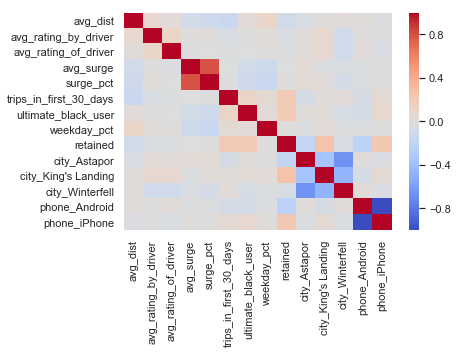

In [25]:
sns.heatmap(df_users.corr(),cmap='coolwarm',vmin=-1, vmax=1)


##### Observations
1. The active customers travelled lesser average distance per trip in first 30 days of their signup.
2. Customer retention is correlted to number of trips taken in first 30 days, the customer being an Ultimate Black user in 1st 30 days, city Kings Landing and iPhone users.
3. Customer retention is negatively correlated to city Astapor and Android users

In [26]:
# Dropping redundant categorical columns
df_users = df_users.drop(['city_Winterfell','phone_Android'],axis=1)

# Converting boolean value to int
df_users['ultimate_black_user'] = df_users.ultimate_black_user.astype(int)

In [27]:
df_users.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,city_Astapor,city_King's Landing,phone_iPhone
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,1,46.2,1,0,1,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,0,50.0,0,1,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,0,100.0,0,1,0,1
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,1,80.0,1,0,1,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,0,82.4,0,0,0,0


In [28]:
# Define the feature and target variables
X = df_users.drop(labels=['last_trip_date','signup_date','retained'],axis=1)
y = df_users.retained

# Split the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30, random_state = 42)

### KNN Classifier

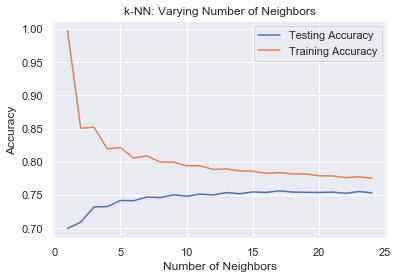

In [30]:
# Commenting out as it takes long time to execute

from sklearn.neighbors import KNeighborsClassifier

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


The above plot shows that the test accuracy is highest at k=17

In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=17)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

In [32]:
print(knn.score(X_test,y_test))

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7564
[[7821 1500]
 [2154 3525]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      9321
           1       0.70      0.62      0.66      5679

   micro avg       0.76      0.76      0.76     15000
   macro avg       0.74      0.73      0.73     15000
weighted avg       0.75      0.76      0.75     15000



### Logistic Regression

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

C:\Users\sony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
print(logreg.score(X_test,y_test))
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7181333333333333
[[7956 1365]
 [2863 2816]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      9321
           1       0.67      0.50      0.57      5679

   micro avg       0.72      0.72      0.72     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.72      0.71     15000



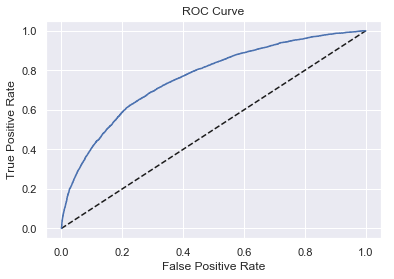

In [35]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### SVC

In [36]:
from sklearn import svm

svc = svm.LinearSVC(dual=False,max_iter=10000)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [37]:
print(svc.score(X_test,y_test))
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7178
[[8053 1268]
 [2965 2714]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      9321
           1       0.68      0.48      0.56      5679

   micro avg       0.72      0.72      0.72     15000
   macro avg       0.71      0.67      0.68     15000
weighted avg       0.71      0.72      0.70     15000



### Comparing score of all the above algorithms

In [54]:
print('Logistic Regression',round(logreg.score(X_test,y_test),3))
print('KNN',round(knn.score(X_test,y_test),3))
print('SVC',round(svc.score(X_test,y_test),3))

Logistic Regression 0.718
KNN 0.756
SVC 0.718


We get the best score from K-nearest neighbor algorithm with k=17. So we choose it for our model.

### Suggestions for Ultimate

Customer retention is correlated to number of trips taken in first 30 days and the customer being an Ultimate Black user in 1st 30 days, city Kings Landing and iPhone users. Customer retention is negatively correlated to city Astapor and Android users Based on this finding, I suggest the following to Ultimate.

1. Find ways to increase number of trips taken in first 30 days to try to retain more customers.
2. Incentivize the use of Ultimate Black for the trips taken in first 30 days.
3. The customer retention is more for iPhone users and lesser for Android users. Ultimate should conduct usability test on its mobile app for iPhone and Android to check the difference in features/bugs, and fix them for Android.
4. Customers who signed up in the city of King's Landing are retained more as compared to customers in Astapor. Further analysis needs to  be done on finding the reason for same.
